In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import joblib
# Data preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Imbalanced learning
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('CVD Dataset.csv')
df

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.000,69.100,1.710,23.600,86.200,125/79,248.000,78.000,111.000,...,Low,N,INTERMEDIARY,171.000,0.504,125.000,79.000,Elevated,140.000,17.930
1,F,55.000,118.700,1.690,41.600,82.500,139/70,162.000,50.000,135.000,...,High,Y,HIGH,169.000,0.488,139.000,70.000,Hypertension Stage 1,82.000,20.510
2,M,NaN,NaN,1.830,26.900,106.700,104/77,103.000,73.000,114.000,...,High,Y,INTERMEDIARY,183.000,0.583,104.000,77.000,Normal,0.000,12.640
3,M,44.000,108.300,1.800,33.400,96.600,140/83,134.000,46.000,91.000,...,High,Y,INTERMEDIARY,NaN,0.537,140.000,83.000,Hypertension Stage 1,58.000,16.360
4,F,32.000,99.500,1.860,28.800,102.700,144/83,146.000,64.000,141.000,...,High,N,INTERMEDIARY,186.000,0.552,144.000,83.000,Hypertension Stage 1,52.000,17.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,F,36.216,90.452,1.678,33.362,71.138,137/82,201.845,53.821,121.094,...,Moderate,Y,INTERMEDIARY,174.801,0.422,126.930,81.553,Hypertension Stage 1,91.345,17.617
4025,M,57.641,105.116,1.547,36.909,67.415,136/76,193.082,72.415,85.014,...,High,N,INTERMEDIARY,163.886,0.388,112.517,74.346,Hypertension Stage 1,30.692,16.636
4026,F,65.618,75.117,1.637,27.140,93.675,129/113,129.023,76.415,127.157,...,Low,Y,HIGH,167.700,0.562,131.480,115.656,Hypertension Stage 2,33.383,16.863
4027,F,38.489,63.362,1.786,20.648,74.218,108/87,223.778,80.748,139.698,...,High,N,INTERMEDIARY,168.897,0.404,102.676,86.515,Hypertension Stage 1,111.316,14.348


In [4]:
# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

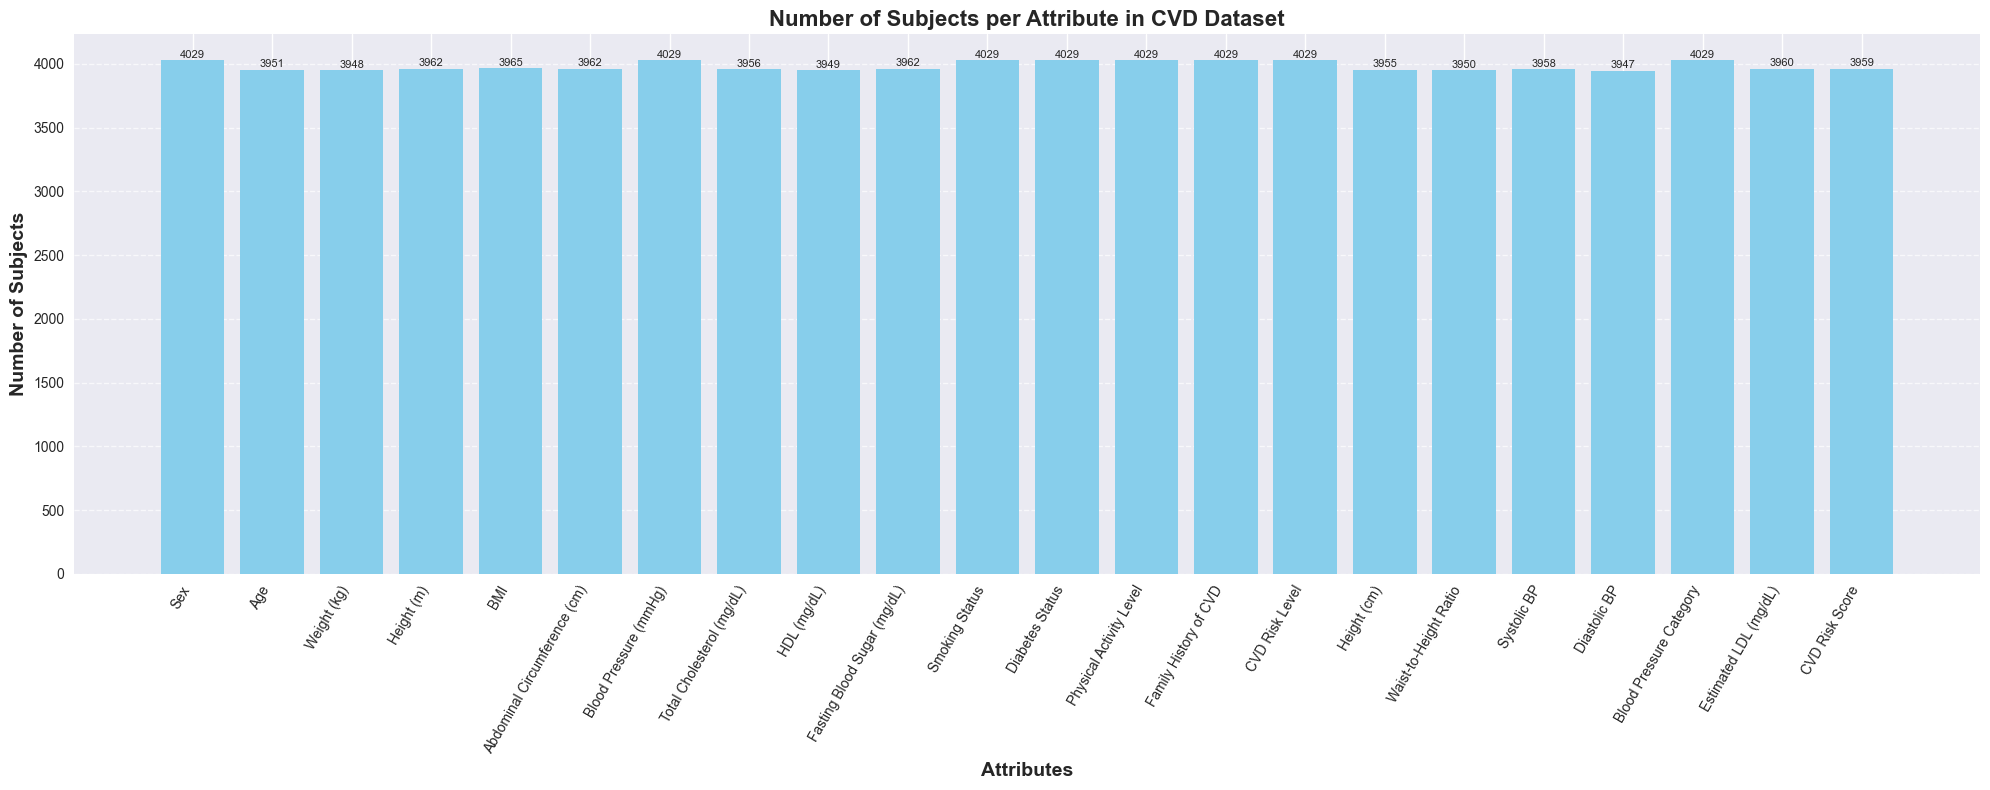

In [6]:
# CVD Dataset Structure: Number of Subjects per Attribute

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('CVD Dataset.csv')

# Count the number of non-null entries for each column
attribute_counts = df.notnull().sum()

# Plotting
plt.figure(figsize=(20, 8))
bars = plt.bar(attribute_counts.index, attribute_counts.values, color='skyblue')

# Adding counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xticks(rotation=60, ha='right')
plt.xlabel('Attributes', fontsize=14, weight='bold')
plt.ylabel('Number of Subjects', fontsize=14, weight='bold')
plt.title('Number of Subjects per Attribute in CVD Dataset', fontsize=16, weight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           4029 non-null   object 
 1   Age                           3951 non-null   float64
 2   Weight (kg)                   3948 non-null   float64
 3   Height (m)                    3962 non-null   float64
 4   BMI                           3965 non-null   float64
 5   Abdominal Circumference (cm)  3962 non-null   float64
 6   Blood Pressure (mmHg)         4029 non-null   object 
 7   Total Cholesterol (mg/dL)     3956 non-null   float64
 8   HDL (mg/dL)                   3949 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   3962 non-null   float64
 10  Smoking Status                4029 non-null   object 
 11  Diabetes Status               4029 non-null   object 
 12  Physical Activity Level       4029 non-null   object 
 13  Fam

In [8]:
df.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,3951.000000,3948.000000,3962.000000,3965.000000,3962.000000,3956.000000,3949.000000,3962.000000,3955.000000,3950.000000,3958.000000,3947.000000,3960.000000,3959.000000
mean,46.721907,86.109102,1.754869,28.415437,91.808474,199.516186,56.329508,117.635410,175.398741,0.525419,125.597646,82.817886,113.202564,16.963279
std,12.252092,21.061247,0.134220,6.998871,13.175194,57.666268,16.040764,30.319801,13.179624,0.083166,22.306925,14.966457,58.236113,2.473944
min,22.766000,44.373000,1.287000,14.362000,63.661000,92.299000,26.151000,59.622000,136.469000,0.329000,79.073000,50.815000,-18.644000,9.422000
25%,37.000000,67.400000,1.658000,22.629000,80.806750,151.000000,42.278000,93.001250,165.988000,0.460000,107.959000,70.637500,63.128750,15.223500
50%,46.000000,86.728000,1.754000,28.146000,91.380500,198.060000,56.118000,115.642000,175.268000,0.522000,124.022000,82.000000,112.000000,16.898000
75%,54.739000,104.422250,1.853000,33.726000,101.838750,249.000000,69.061000,137.559250,184.825000,0.583000,140.634750,93.000000,160.000000,18.630000
max,86.924000,134.781000,2.318000,50.395000,134.202000,327.776000,96.769000,213.070000,220.003000,0.841000,197.536000,131.802000,258.273000,25.862000


In [9]:
# Enhanced Data Exploration
print("=== ENHANCED DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Target Distribution:")
print(df['CVD Risk Level'].value_counts())
print(f"Target Distribution (%):")
print(df['CVD Risk Level'].value_counts(normalize=True) * 100)


=== ENHANCED DATASET OVERVIEW ===
Shape: (4029, 22)
Target Distribution:
CVD Risk Level
HIGH            1867
INTERMEDIARY    1574
LOW              588
Name: count, dtype: int64
Target Distribution (%):
CVD Risk Level
HIGH            46.339042
INTERMEDIARY    39.066766
LOW             14.594192
Name: proportion, dtype: float64


In [10]:
# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"Total missing: {df.isnull().sum().sum()}")


Missing Values:
Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64
Total missing: 1022


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

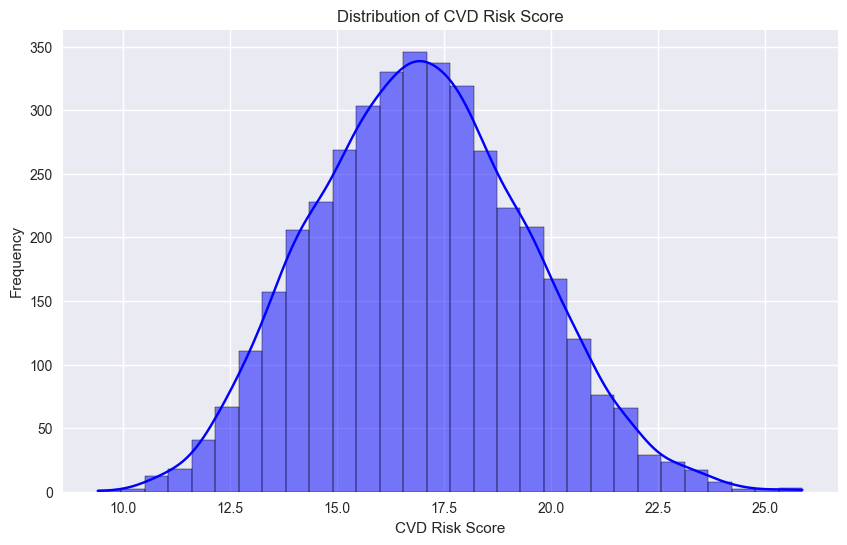

In [12]:
# Plotting the distribution of CVD Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['CVD Risk Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of CVD Risk Score')
plt.xlabel('CVD Risk Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

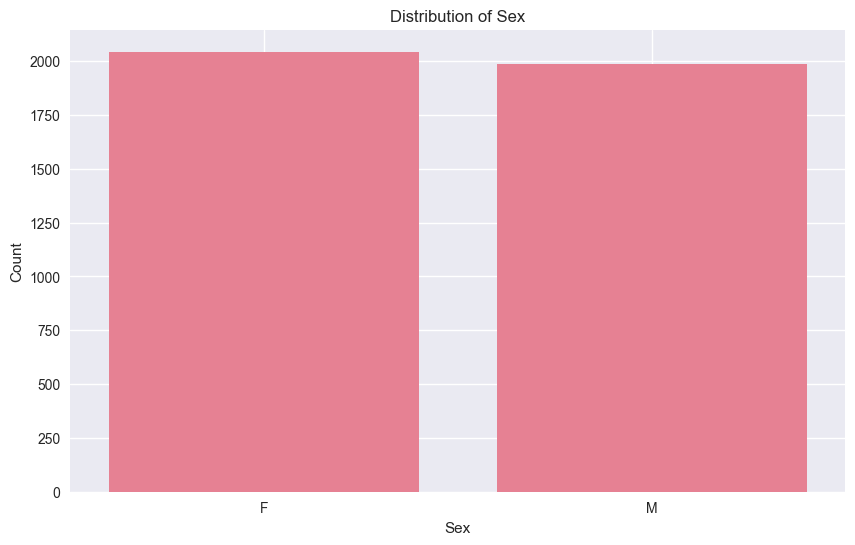

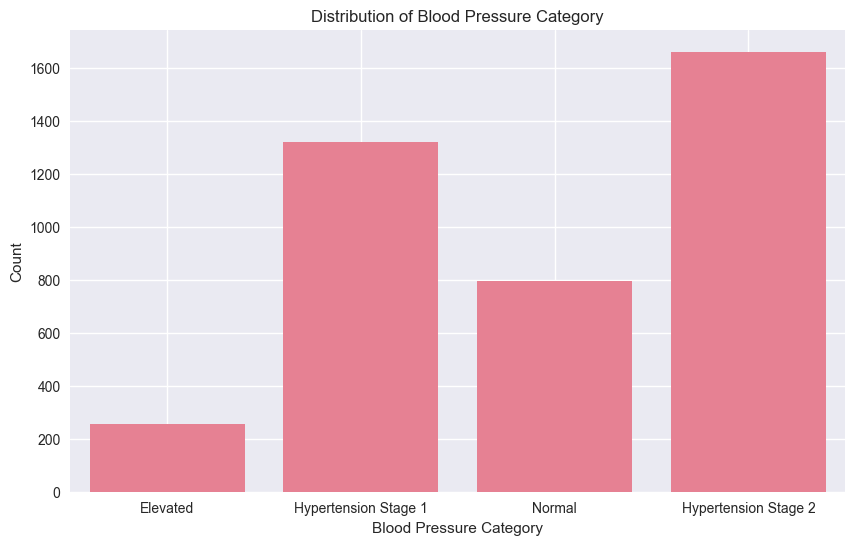

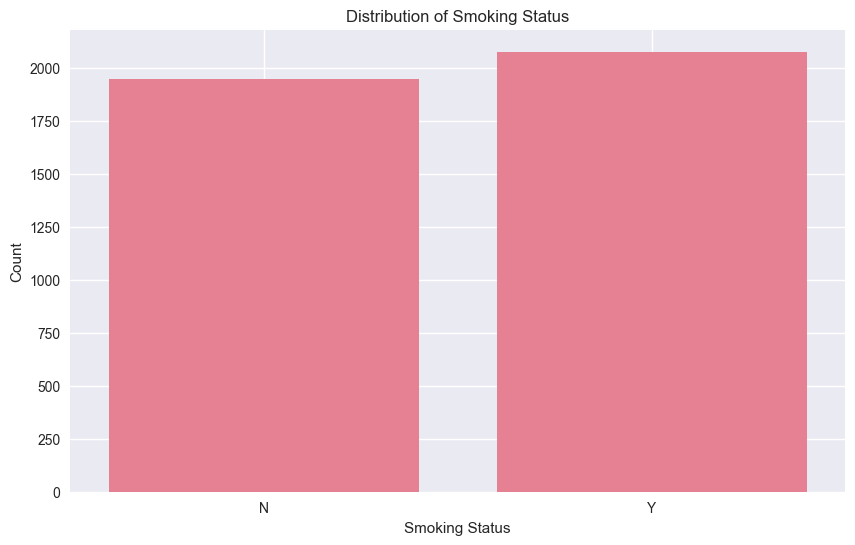

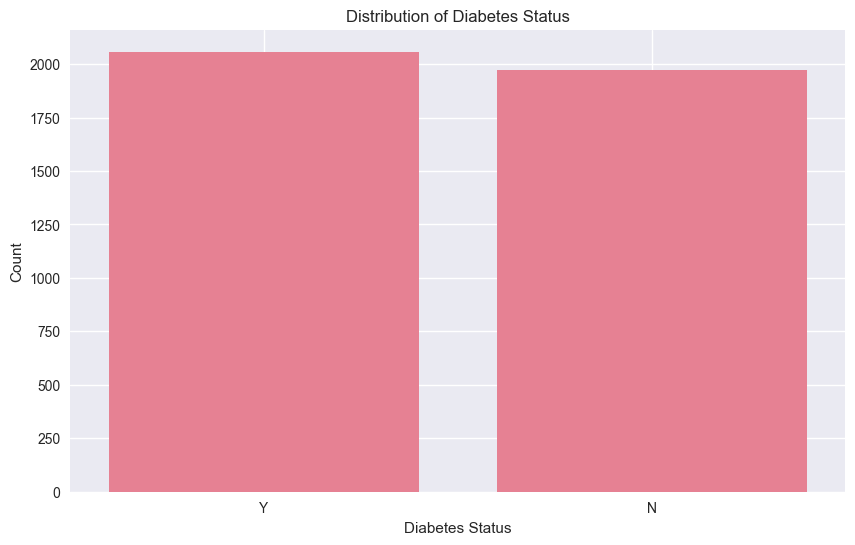

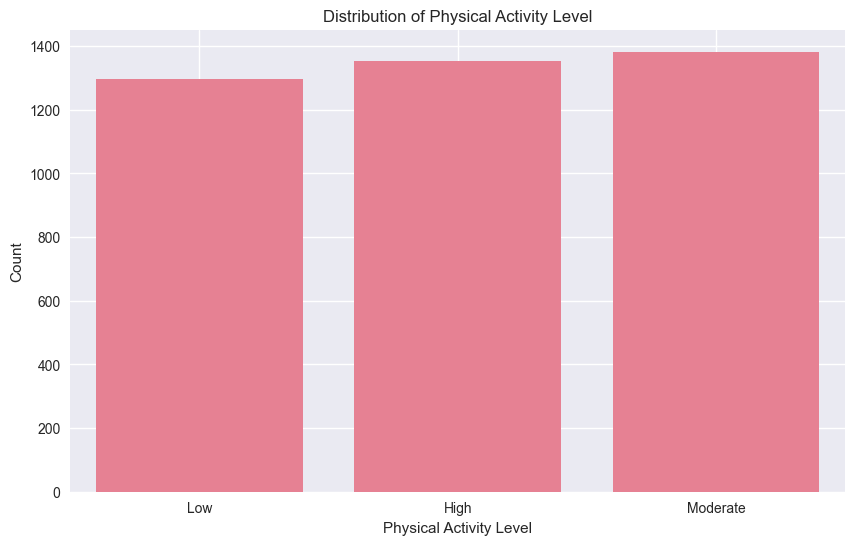

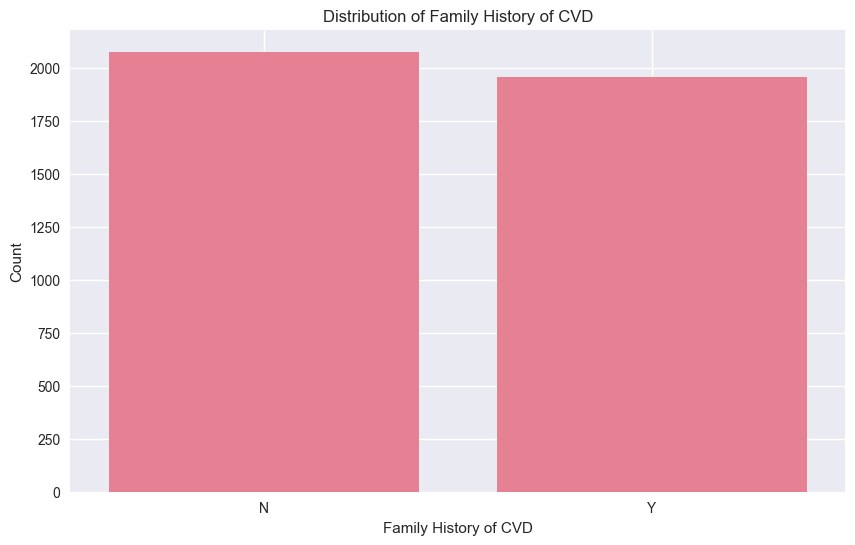

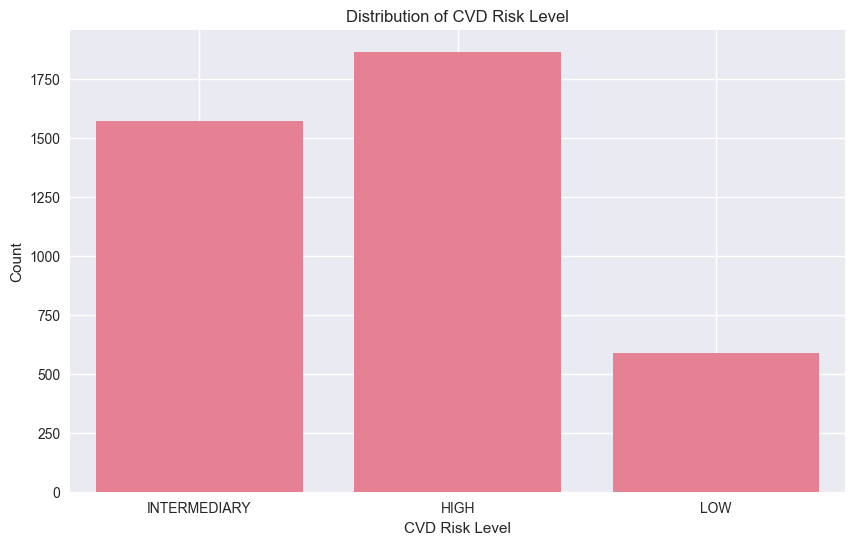

In [13]:
# Analyzing categorical columns
categorical_columns = ['Sex', 'Blood Pressure Category', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

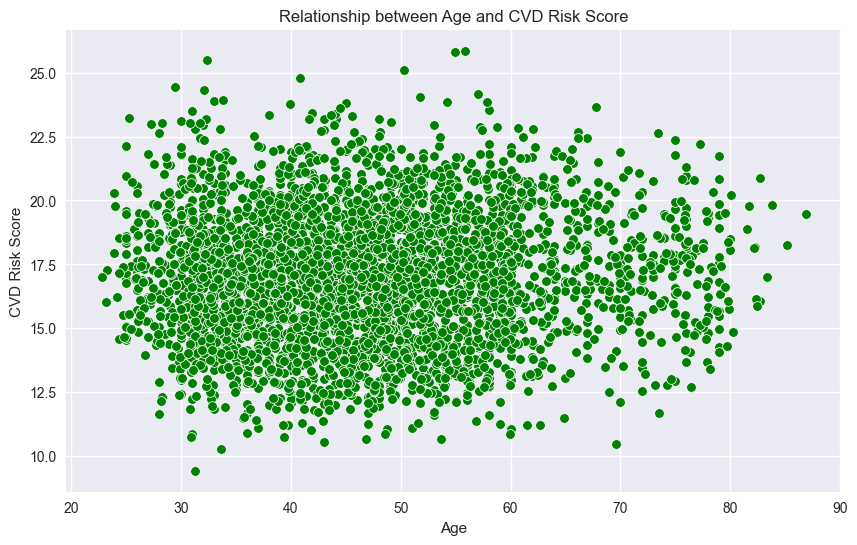

In [14]:
# Analyzing the relationship between Age and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CVD Risk Score', data=df, color='green')
plt.title('Relationship between Age and CVD Risk Score')
plt.xlabel('Age')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

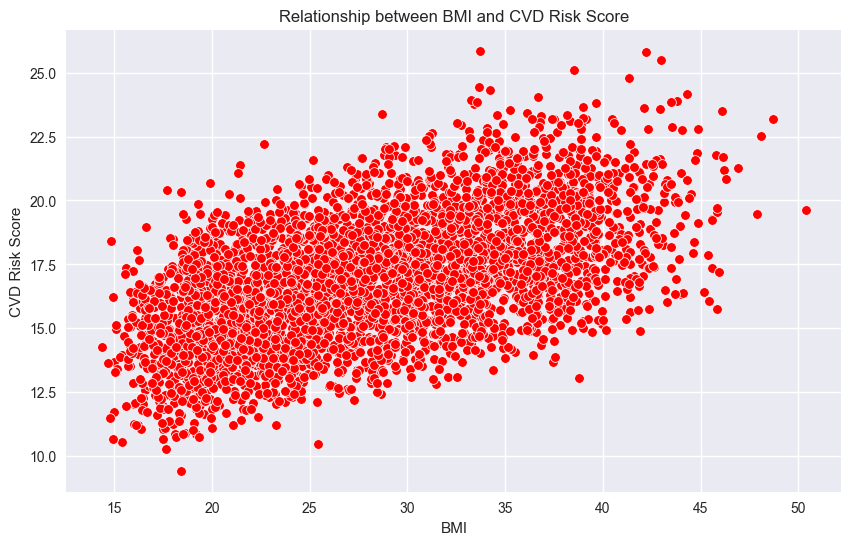

In [15]:
# Analyzing the relationship between BMI and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='CVD Risk Score', data=df, color='red')
plt.title('Relationship between BMI and CVD Risk Score')
plt.xlabel('BMI')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

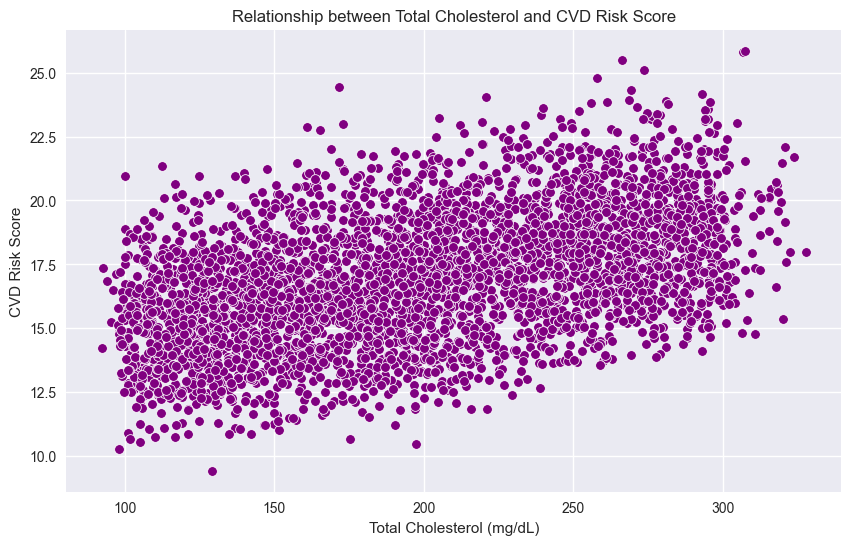

In [16]:
# Analyzing the relationship between Total Cholesterol and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cholesterol (mg/dL)', y='CVD Risk Score', data=df, color='purple')
plt.title('Relationship between Total Cholesterol and CVD Risk Score')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

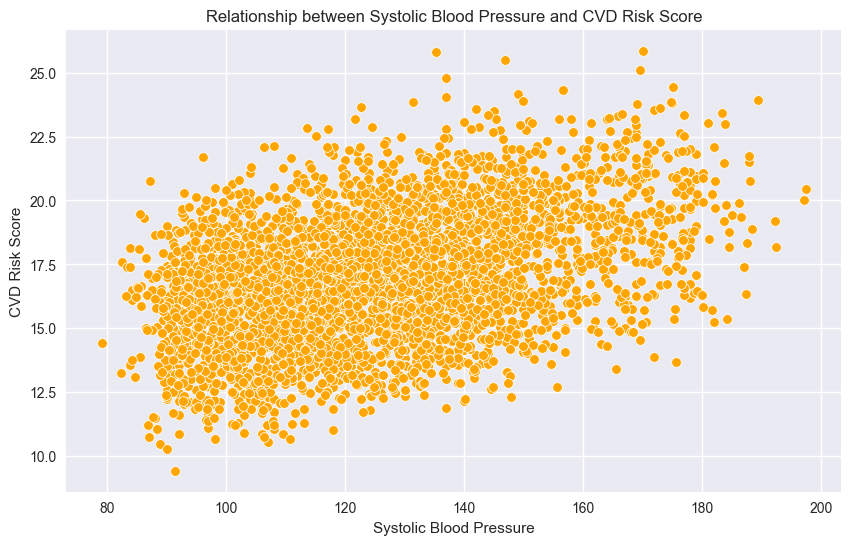

In [17]:
# Analyzing the relationship between Blood Pressure and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='orange')
plt.title('Relationship between Systolic Blood Pressure and CVD Risk Score')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

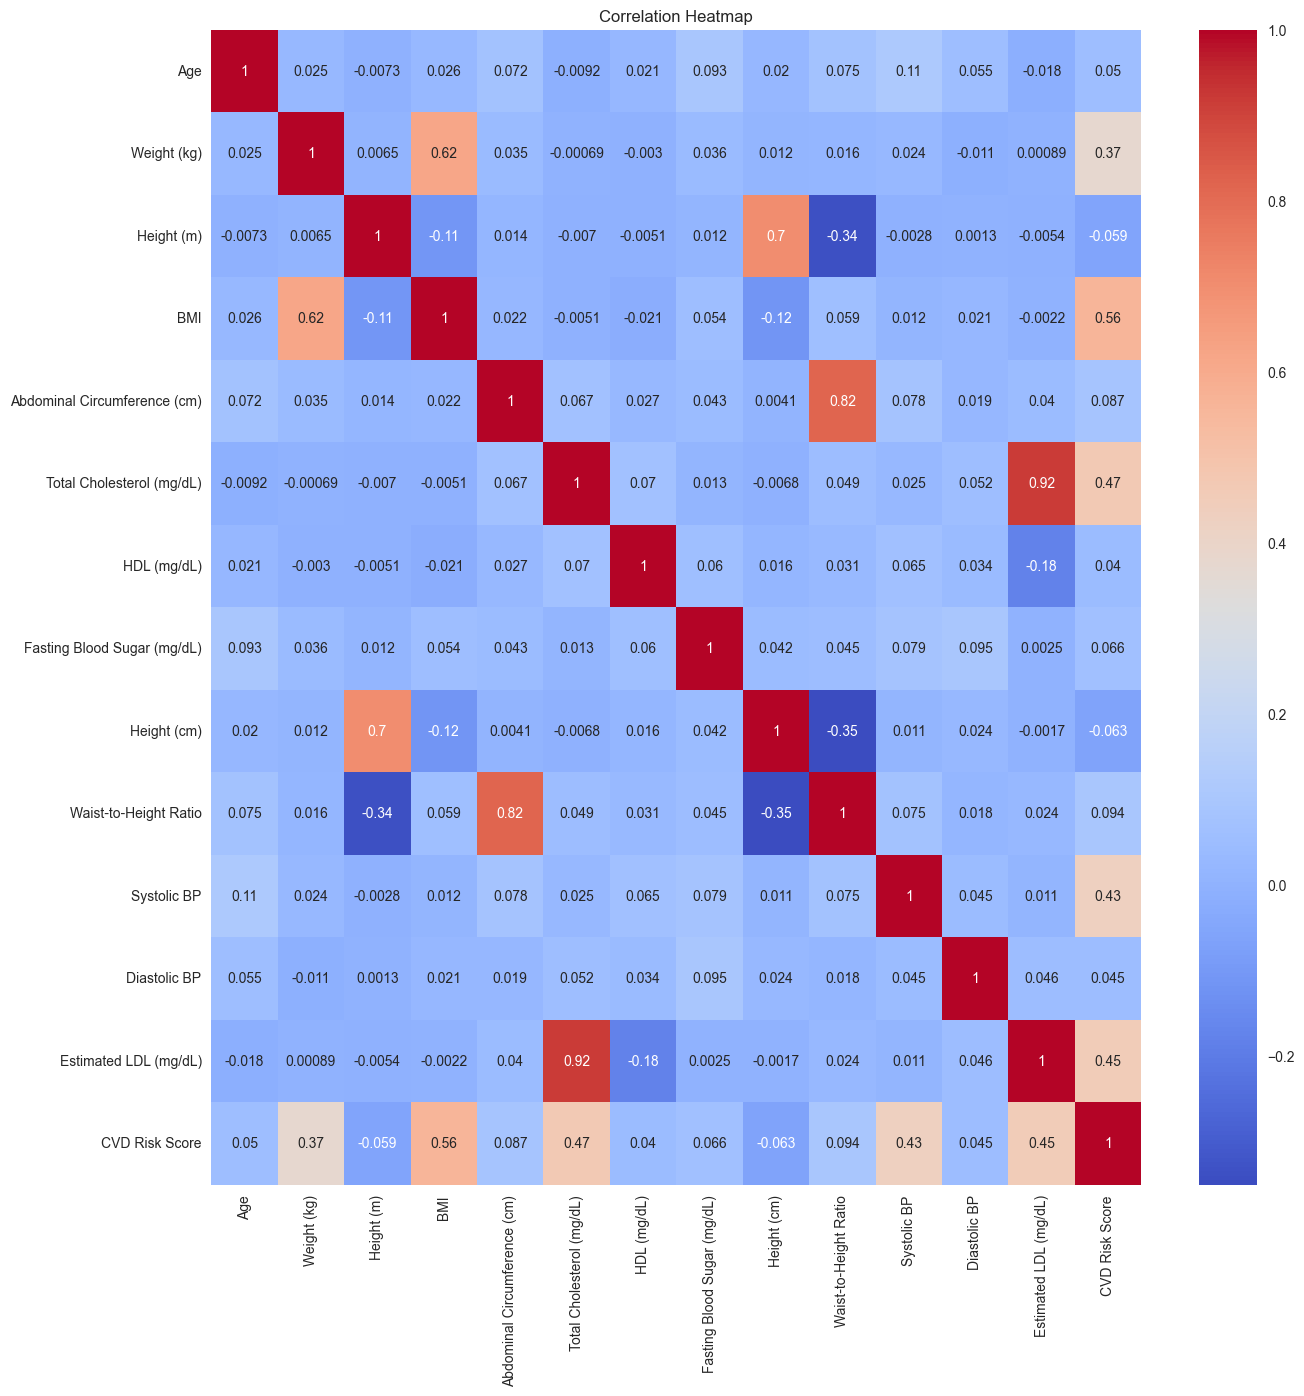

In [18]:
# Correlation Heatmap
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

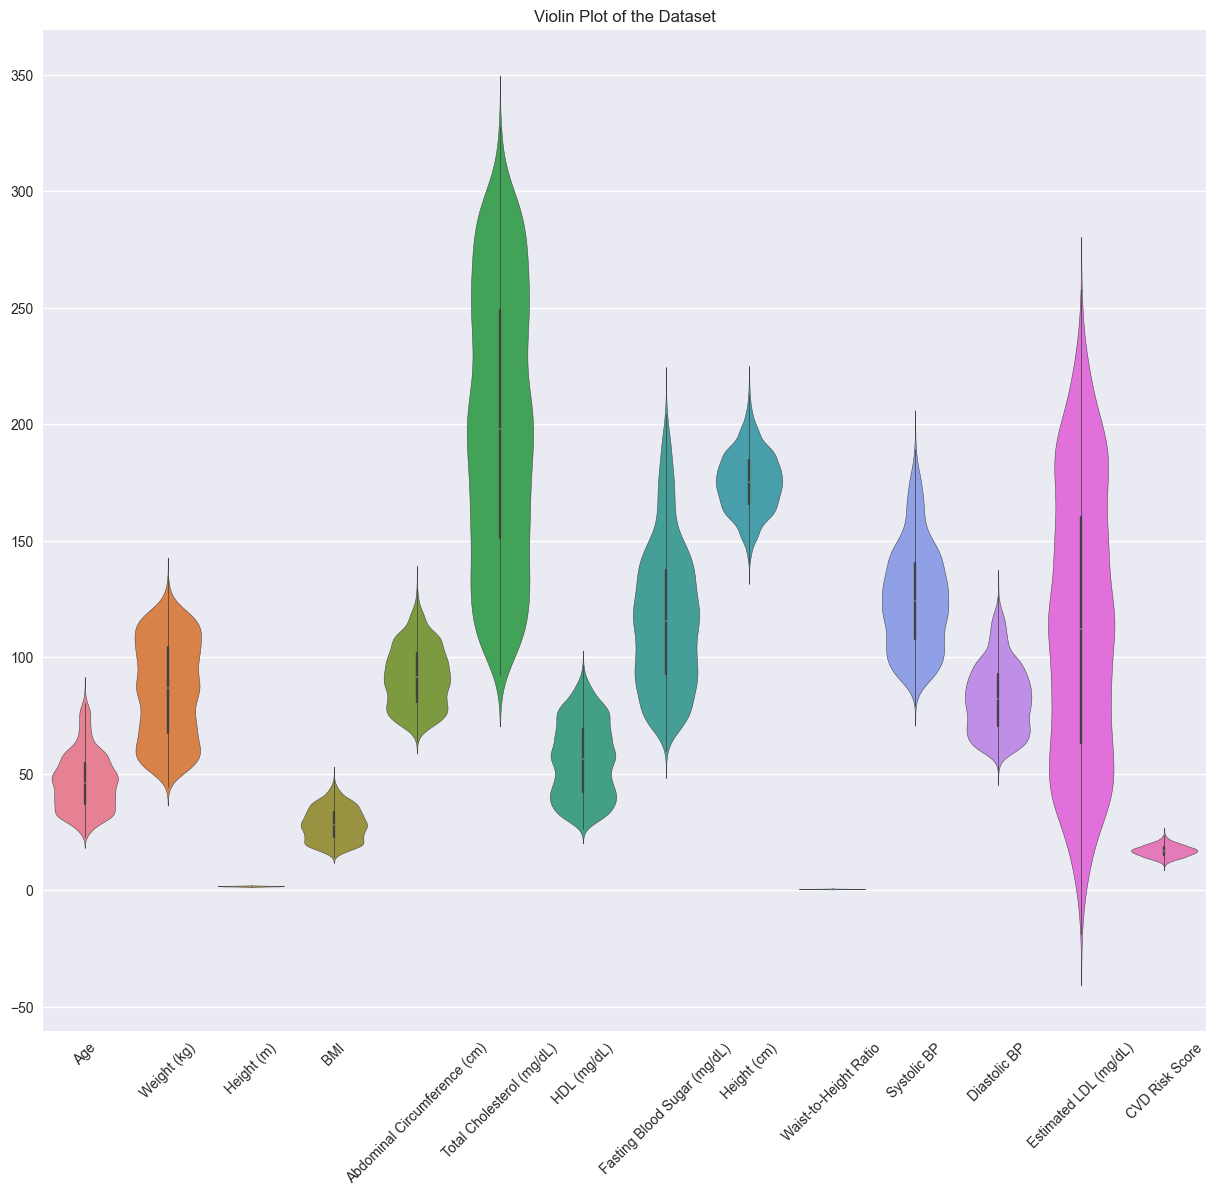

In [19]:
# Violin Plot of the Dataset
plt.figure(figsize=(15, 13))
sns.violinplot(data=df)
plt.title('Violin Plot of the Dataset')
plt.xticks(rotation=45)
plt.show()

<Figure size 400x300 with 0 Axes>

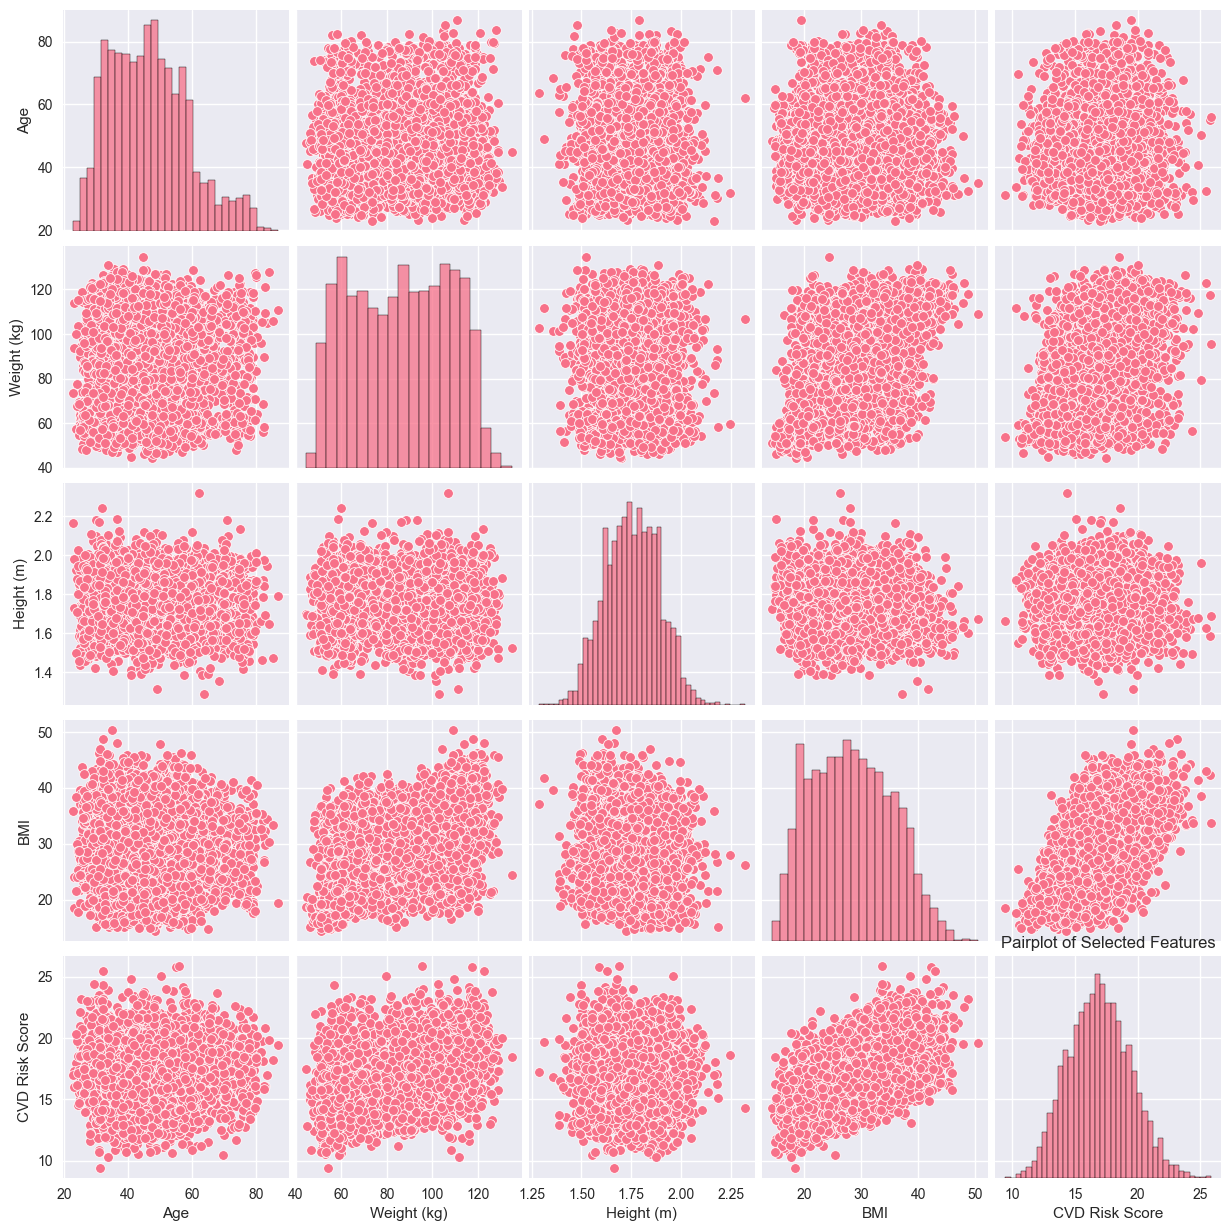

In [20]:
# Pairplot of Selected Features
plt.figure(figsize=(4, 3))
sns.pairplot(df[['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'CVD Risk Score']], markers=['o', 's', 'D'])
plt.title('Pairplot of Selected Features')
plt.show()

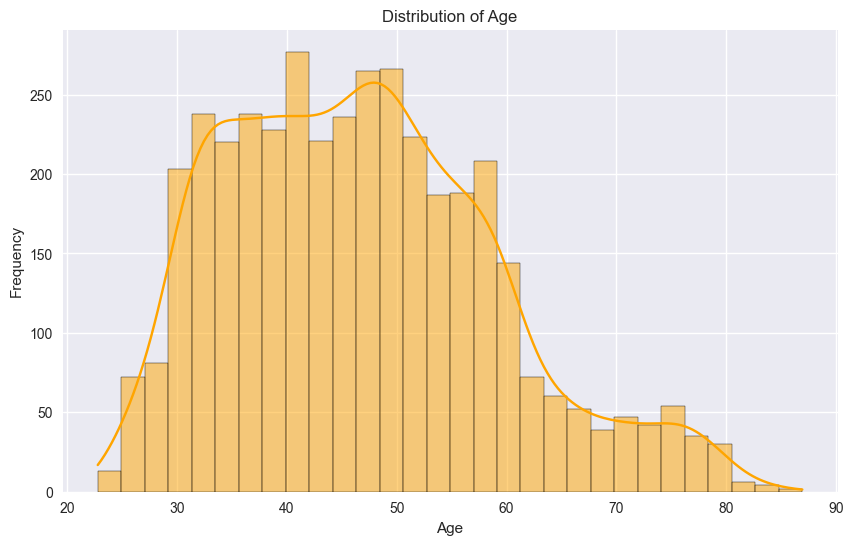

In [21]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

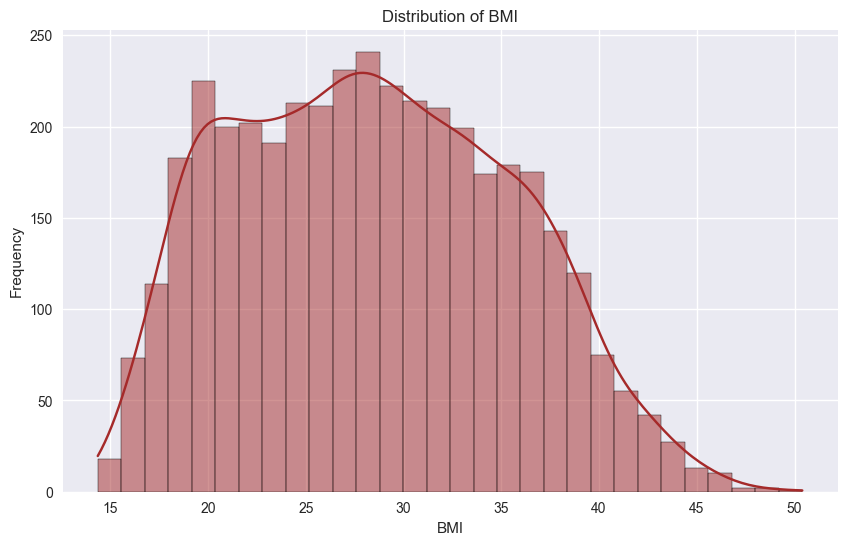

In [22]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='brown')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

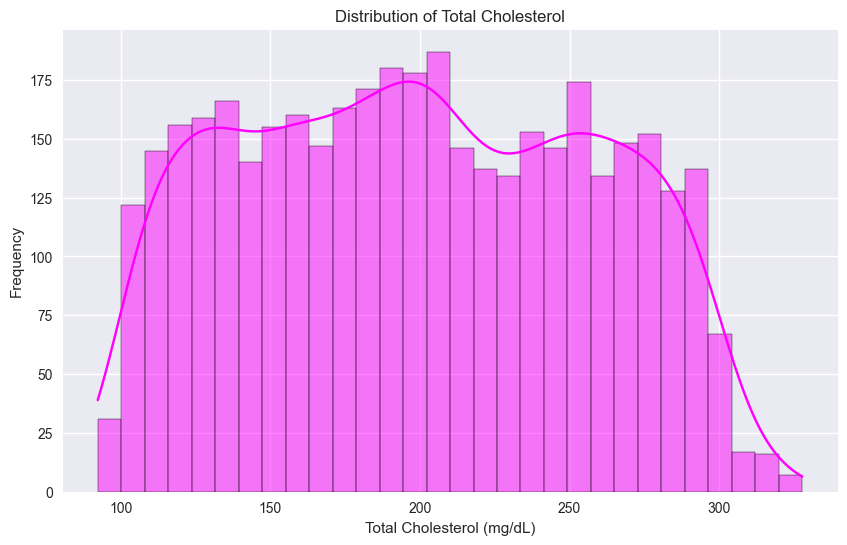

In [23]:
# Distribution of Total Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Cholesterol (mg/dL)'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

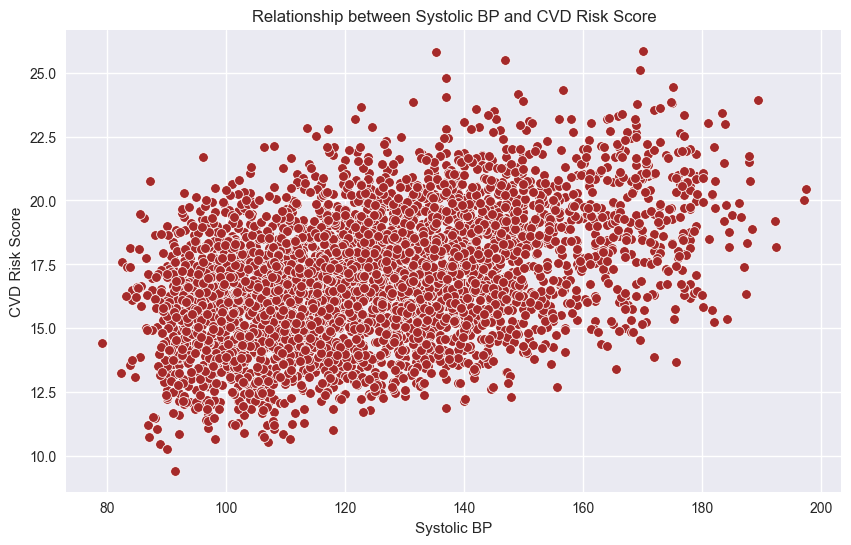

In [24]:
# Relationship between Systolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='brown')
plt.title('Relationship between Systolic BP and CVD Risk Score')
plt.xlabel('Systolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

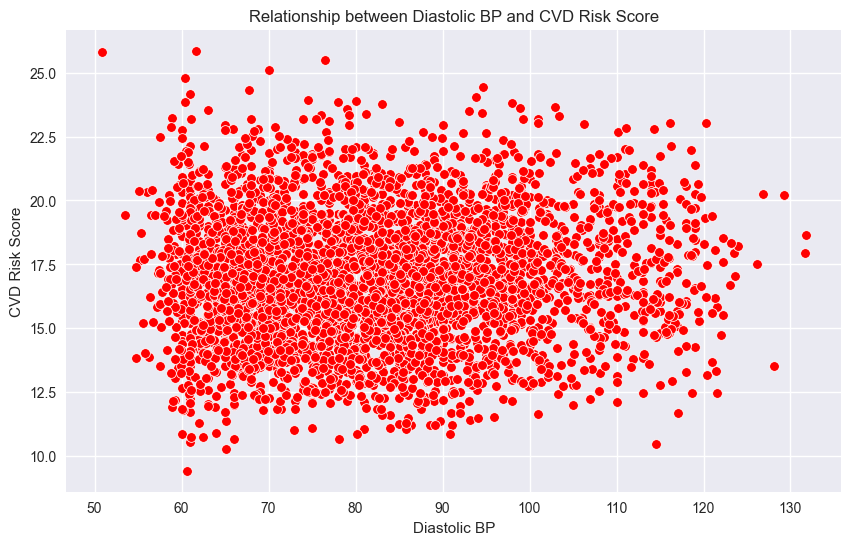

In [25]:
# Relationship between Diastolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diastolic BP', y='CVD Risk Score', data=df, color='red')
plt.title('Relationship between Diastolic BP and CVD Risk Score')
plt.xlabel('Diastolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

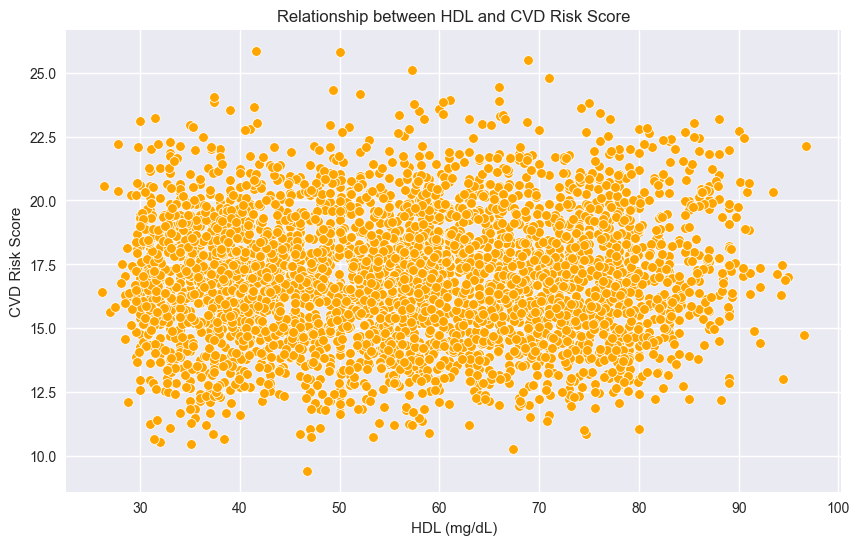

In [26]:
# Relationship between HDL and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDL (mg/dL)', y='CVD Risk Score', data=df, color='orange')
plt.title('Relationship between HDL and CVD Risk Score')
plt.xlabel('HDL (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

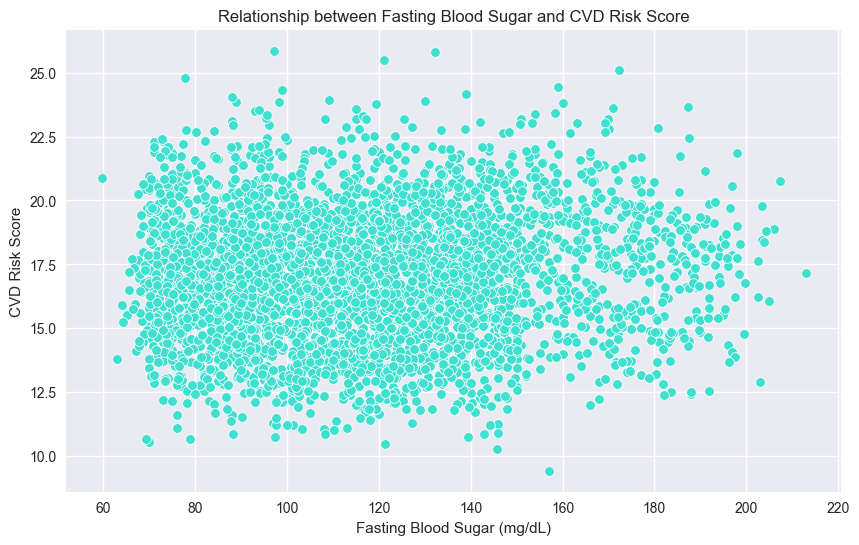

In [27]:
# Relationship between Fasting Blood Sugar and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fasting Blood Sugar (mg/dL)', y='CVD Risk Score', data=df, color='turquoise')
plt.title('Relationship between Fasting Blood Sugar and CVD Risk Score')
plt.xlabel('Fasting Blood Sugar (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

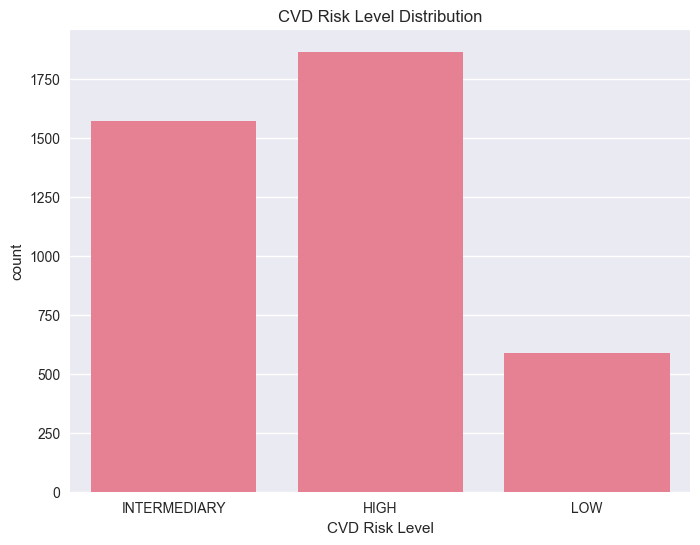

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the balance of the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='CVD Risk Level', data=df)
plt.title('CVD Risk Level Distribution')
plt.show()

In [29]:
# Explore imbalance in the dataset
print(df['CVD Risk Level'].value_counts())

CVD Risk Level
HIGH            1867
INTERMEDIARY    1574
LOW              588
Name: count, dtype: int64


## data preprocessing


In [30]:
print("=== ENHANCED FEATURE ENGINEERING ===")


=== ENHANCED FEATURE ENGINEERING ===


In [31]:
X = df.drop(['CVD Risk Level'], axis=1)
y = df['CVD Risk Level']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (4029, 21)
Target (y) Shape Before Balancing : (4029,)


In [32]:
# Create new features
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Adult', 'Middle', 'Senior'])
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['BP_Ratio'] = df['Systolic BP'] / df['Diastolic BP']
df['Cholesterol_Ratio'] = df['Total Cholesterol (mg/dL)'] / df['HDL (mg/dL)']
df['Metabolic_Index'] = df['BMI'] * df['Fasting Blood Sugar (mg/dL)'] / 100
df['Cardiovascular_Index'] = (df['Systolic BP'] + df['Diastolic BP']) * df['Age'] / 100

In [33]:
# Create interaction features
df['Age_BMI_Interaction'] = df['Age'] * df['BMI']
df['BP_Cholesterol_Interaction'] = df['Systolic BP'] * df['Total Cholesterol (mg/dL)'] / 1000

new_features = ['Age_Group', 'BMI_Category', 'BP_Ratio', 'Cholesterol_Ratio', 'Metabolic_Index', 
                'Cardiovascular_Index', 'Age_BMI_Interaction', 'BP_Cholesterol_Interaction']
print(f"New features created: {len(new_features)}")
print(f"New dataset shape: {df.shape}")

New features created: 8
New dataset shape: (4029, 30)


In [34]:
# Display new features
print("\nNew Features Preview:")
print(df[new_features].head())


New Features Preview:
  Age_Group BMI_Category  BP_Ratio  Cholesterol_Ratio  Metabolic_Index  \
0     Adult       Normal  1.582278           3.179487           26.196   
1    Middle        Obese  1.985714           3.240000           56.160   
2       NaN   Overweight  1.350649           1.410959           30.666   
3     Adult        Obese  1.686747           2.913043           30.394   
4     Adult   Overweight  1.734940           2.281250           40.608   

   Cardiovascular_Index  Age_BMI_Interaction  BP_Cholesterol_Interaction  
0                 65.28                755.2                      31.000  
1                114.95               2288.0                      22.518  
2                   NaN                  NaN                      10.712  
3                 98.12               1469.6                      18.760  
4                 72.64                921.6                      21.024  


In [35]:
print("=== ENHANCED DATA PREPROCESSING ===")

=== ENHANCED DATA PREPROCESSING ===


In [36]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_columns)}")
print(f"Categorical columns: {len(categorical_columns)}")

Numerical columns: 20
Categorical columns: 8


In [37]:
# Remove target variable from numerical columns
if 'CVD Risk Level' in numerical_columns:
    numerical_columns.remove('CVD Risk Level')


In [38]:
# Handle missing values
print("\nHandling missing values...")
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing values in {col} with median")

for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in {col} with mode")

print(f"\nMissing values after handling: {df.isnull().sum().sum()}")



Handling missing values...
Filled missing values in Age with median
Filled missing values in Weight (kg) with median
Filled missing values in Height (m) with median
Filled missing values in BMI with median
Filled missing values in Abdominal Circumference (cm) with median
Filled missing values in Total Cholesterol (mg/dL) with median
Filled missing values in HDL (mg/dL) with median
Filled missing values in Fasting Blood Sugar (mg/dL) with median
Filled missing values in Height (cm) with median
Filled missing values in Waist-to-Height Ratio with median
Filled missing values in Systolic BP with median
Filled missing values in Diastolic BP with median
Filled missing values in Estimated LDL (mg/dL) with median
Filled missing values in CVD Risk Score with median
Filled missing values in BP_Ratio with median
Filled missing values in Cholesterol_Ratio with median
Filled missing values in Metabolic_Index with median
Filled missing values in Cardiovascular_Index with median
Filled missing value

In [39]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score',
       'Age_Group', 'BMI_Category', 'BP_Ratio', 'Cholesterol_Ratio',
       'Metabolic_Index', 'Cardiovascular_Index', 'Age_BMI_Interaction',
       'BP_Cholesterol_Interaction'],
      dtype='object')

In [40]:
# Enhanced Feature Encoding and Scaling
print("\n=== FEATURE ENCODING AND SCALING ===")



=== FEATURE ENCODING AND SCALING ===


In [41]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    if col != 'CVD Risk Level':  # Don't encode target yet
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"Encoded {col} with {len(le.classes_)} classes")

Encoded Sex with 2 classes
Encoded Blood Pressure (mmHg) with 1254 classes
Encoded Smoking Status with 2 classes
Encoded Diabetes Status with 2 classes
Encoded Physical Activity Level with 3 classes
Encoded Family History of CVD with 2 classes
Encoded Blood Pressure Category with 4 classes


In [42]:
# Encode target variable
target_encoder = LabelEncoder()
df['CVD_Risk_encoded'] = target_encoder.fit_transform(df['CVD Risk Level'])
print(f"\nTarget encoding: {dict(zip(target_encoder.classes_, range(len(target_encoder.classes_))))}")



Target encoding: {'HIGH': 0, 'INTERMEDIARY': 1, 'LOW': 2}


In [43]:
# Create final feature set
feature_columns = numerical_columns + [col + '_encoded' for col in categorical_columns if col != 'CVD Risk Level']
print(f"\nTotal features: {len(feature_columns)}")
print(f"Feature columns: {feature_columns[:10]}...")


Total features: 27
Feature columns: ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)', 'Waist-to-Height Ratio']...


In [44]:
print("=== ADVANCED FEATURE SELECTION ===")

=== ADVANCED FEATURE SELECTION ===


In [45]:
# Prepare data for feature selection
X_features = df[feature_columns].copy()
y_target = df['CVD_Risk_encoded'].copy()


In [46]:
# Remove any remaining infinite values
X_features = X_features.replace([np.inf, -np.inf], np.nan)
X_features = X_features.fillna(X_features.median())


In [47]:
# Feature selection using multiple methods
print("1. Statistical Feature Selection (F-test)...")
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X_features, y_target)
f_scores = pd.DataFrame({'Feature': feature_columns, 'F_Score': f_selector.scores_})
f_scores = f_scores.sort_values('F_Score', ascending=False)
print(f_scores.head(10))

print("\n2. Mutual Information Feature Selection...")
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X_features, y_target)
mi_scores = pd.DataFrame({'Feature': feature_columns, 'MI_Score': mi_selector.scores_})
mi_scores = mi_scores.sort_values('MI_Score', ascending=False)
print(mi_scores.head(10))

1. Statistical Feature Selection (F-test)...
                          Feature     F_Score
13                 CVD Risk Score  150.650090
15              Cholesterol_Ratio  110.127885
22         Smoking Status_encoded  101.146258
25  Family History of CVD_encoded   87.607126
12          Estimated LDL (mg/dL)   79.948991
23        Diabetes Status_encoded   77.005862
3                             BMI   76.762402
6                     HDL (mg/dL)   58.430529
18            Age_BMI_Interaction   57.916618
5       Total Cholesterol (mg/dL)   45.059069

2. Mutual Information Feature Selection...
                            Feature  MI_Score
21    Blood Pressure (mmHg)_encoded  0.498138
12            Estimated LDL (mg/dL)  0.046181
24  Physical Activity Level_encoded  0.043454
13                   CVD Risk Score  0.038876
16                  Metabolic_Index  0.034433
0                               Age  0.033070
15                Cholesterol_Ratio  0.030509
17             Cardiovascular_Index  

In [48]:
# Select top features based on both methods
top_features_f = f_scores.head(15)['Feature'].tolist()
top_features_mi = mi_scores.head(15)['Feature'].tolist()
selected_features = list(set(top_features_f + top_features_mi))
print(f"\nSelected features ({len(selected_features)}): {selected_features}")



Selected features (19): ['Smoking Status_encoded', 'Cardiovascular_Index', 'Physical Activity Level_encoded', 'Age', 'Systolic BP', 'Blood Pressure Category_encoded', 'Family History of CVD_encoded', 'Total Cholesterol (mg/dL)', 'Blood Pressure (mmHg)_encoded', 'Diabetes Status_encoded', 'Estimated LDL (mg/dL)', 'Metabolic_Index', 'BP_Cholesterol_Interaction', 'Weight (kg)', 'BMI', 'CVD Risk Score', 'Cholesterol_Ratio', 'Age_BMI_Interaction', 'HDL (mg/dL)']


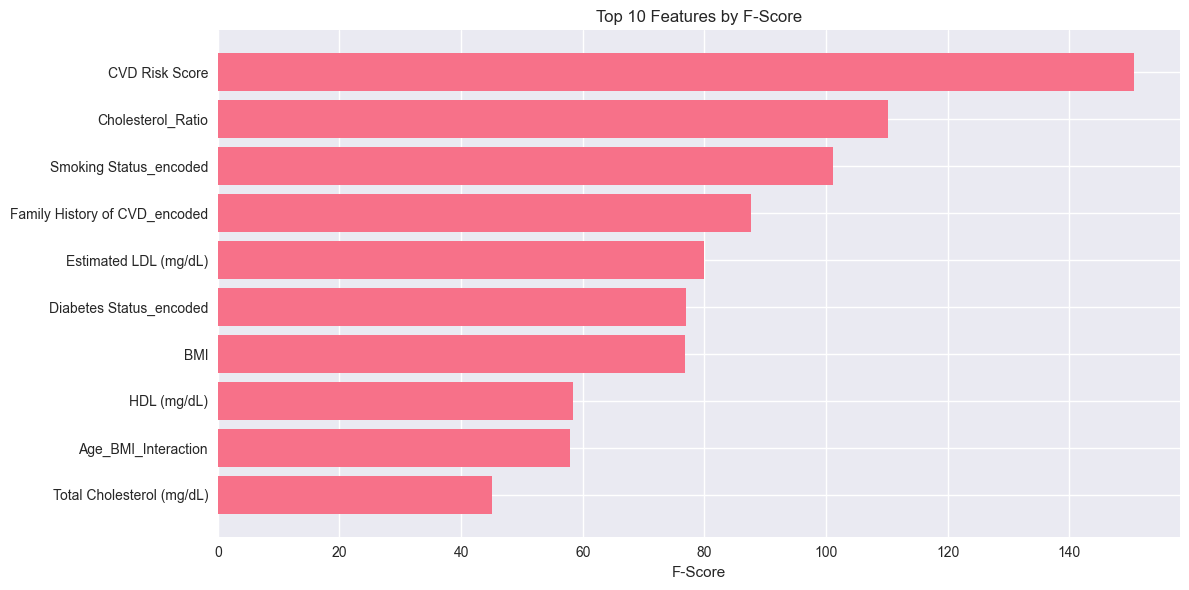

In [49]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features_combined = f_scores.head(10)
plt.barh(range(len(top_features_combined)), top_features_combined['F_Score'])
plt.yticks(range(len(top_features_combined)), top_features_combined['Feature'])
plt.xlabel('F-Score')
plt.title('Top 10 Features by F-Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [50]:
print("=== ENHANCED DATA BALANCING AND SPLITTING ===")


=== ENHANCED DATA BALANCING AND SPLITTING ===


In [51]:
# Use selected features
X_selected = X_features[selected_features].copy()
y_selected = y_target.copy()

print(f"Original class distribution:")
print(pd.Series(y_selected).value_counts())


Original class distribution:
CVD_Risk_encoded
0    1867
1    1574
2     588
Name: count, dtype: int64


In [52]:
# Advanced balancing techniques
print("\nApplying SMOTEENN for balanced sampling...")
smoteenn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smoteenn.fit_resample(X_selected, y_selected)

print(f"Balanced class distribution:")
print(pd.Series(y_balanced).value_counts())


Applying SMOTEENN for balanced sampling...
Balanced class distribution:
CVD_Risk_encoded
2    1568
1     853
0     690
Name: count, dtype: int64


In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")


Training set: (2488, 19)
Test set: (623, 19)
Training class distribution: [ 552  682 1254]
Test class distribution: [138 171 314]


In [54]:
print("\n=== ENHANCED MODEL PIPELINE ===")



=== ENHANCED MODEL PIPELINE ===


In [55]:
# Create preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [56]:
# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Preprocessing completed")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Preprocessing completed
Training data shape: (2488, 19)
Test data shape: (623, 19)


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Training and Evaluating the Decision Tree Classifier with improved parameters
clf = DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=14,min_samples_split=10, random_state=64)
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, predDT))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.66      0.35      0.45       138
           1       0.52      0.49      0.50       171
           2       0.68      0.84      0.75       314

    accuracy                           0.63       623
   macro avg       0.62      0.56      0.57       623
weighted avg       0.63      0.63      0.62       623



In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(6,7),
    'random_state':range(64,100,64),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=64)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(6, 7), 'max_features': ['auto', 'sqrt', ...], 'random_state': range(64, 100, 64)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [59]:
CV_dt.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'random_state': 64}

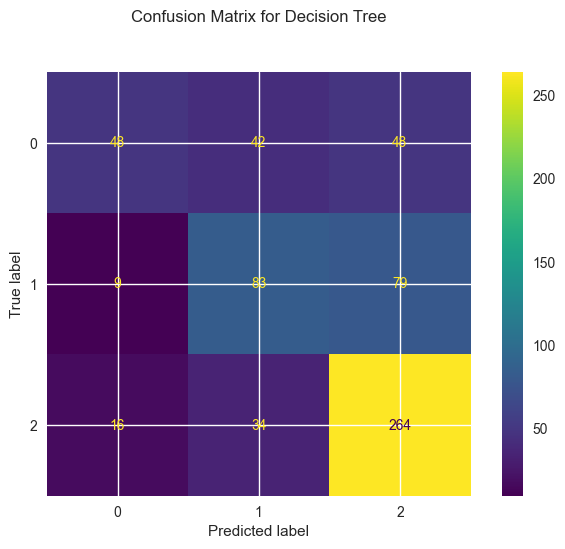

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix for Decision Tree', y=1.1)
plt.show()

In [61]:
import joblib
# Dumping Decision Tree Classifier
joblib.dump(clf, 'dt_clf.pkl')

['dt_clf.pkl']

## Random Forest


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Training and Evaluating the Decision Tree Classifier with improved parameters
clf = RandomForestClassifier(max_depth=9, min_samples_leaf=14,min_samples_split=31, random_state=64)
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, predDT))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.83      0.61      0.70       138
           1       0.82      0.71      0.76       171
           2       0.80      0.96      0.88       314

    accuracy                           0.81       623
   macro avg       0.82      0.76      0.78       623
weighted avg       0.81      0.81      0.80       623



In [63]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a base model
rf = RandomForestClassifier(random_state=50)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
grid_search.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

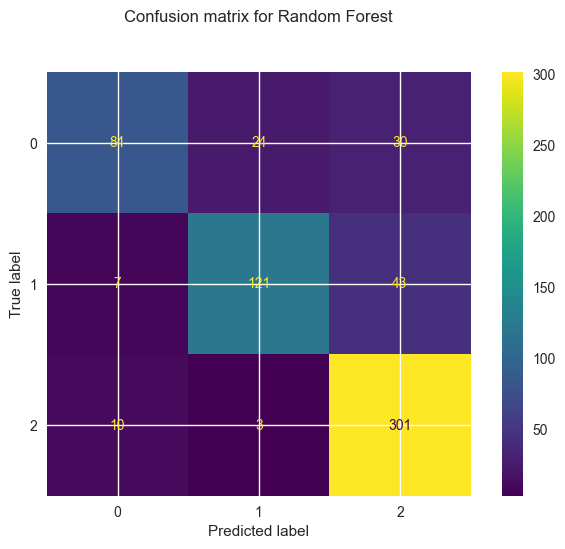

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

In [65]:
import joblib
joblib.dump(clf, 'rf_clf.pkl')

['rf_clf.pkl']

## Logistic Regression

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 10, 'max_iter': 2000, 'penalty': 'l2'}


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

clf = LogisticRegression(max_iter=9, random_state=64)
clf.fit(X_train_imputed, y_train)
predDT = clf.predict(X_test_imputed)
print("Classification Report for Logistic Regression Classifier:")
print(classification_report(y_test, predDT))

Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.32      0.05      0.09       138
           1       0.00      0.00      0.00       171
           2       0.51      0.98      0.67       314

    accuracy                           0.50       623
   macro avg       0.28      0.34      0.25       623
weighted avg       0.33      0.50      0.36       623



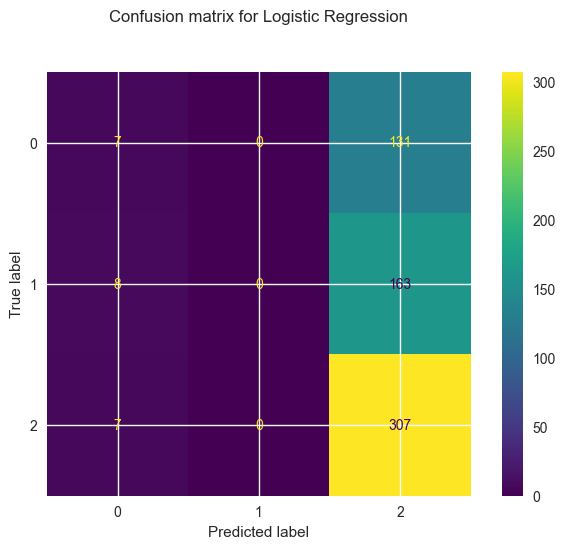

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, predDT)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

In [71]:
import joblib
joblib.dump(clf, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## SVM (Support Vector Machine)


In [72]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a svm Classifier
clf = SVC(kernel='linear')
# Train the model using the training sets
clf.fit(X_train_imputed, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)

print("Classification Report for SVM Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       138
           1       0.50      0.32      0.39       171
           2       0.63      0.81      0.71       314

    accuracy                           0.61       623
   macro avg       0.59      0.55      0.56       623
weighted avg       0.60      0.61      0.60       623



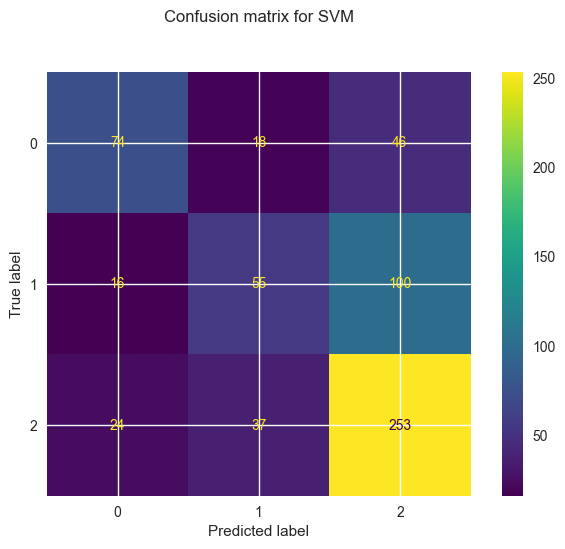

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming clf is the SVM model defined earlier
y_pred = clf.predict(X_test_imputed)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

In [74]:
joblib.dump(clf, 'svm_model.pkl')

['svm_model.pkl']

## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the parameter grid for the grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

# Initialize GaussianNB with default parameters
gnb = GaussianNB()

# Perform grid search over specified parameter values
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
best_gnb = grid_search.best_estimator_
predgnb = best_gnb.predict(X_test_scaled)

print("Classification Report for Naive Bayes Classifier:")
print(classification_report(y_test, predgnb))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Classification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.54      0.55      0.54       138
           1       0.43      0.65      0.51       171
           2       0.72      0.50      0.59       314

    accuracy                           0.55       623
   macro avg       0.56      0.57      0.55       623
weighted avg       0.60      0.55      0.56       623



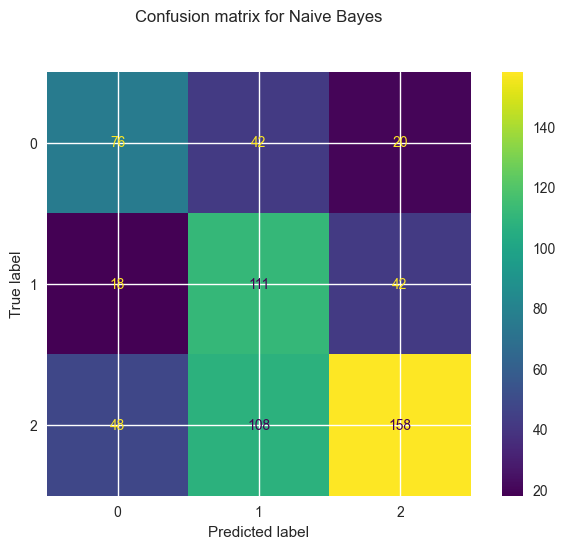

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, predgnb)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.show()

In [77]:
joblib.dump(best_gnb, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

## KNN Classifier

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Classification Report for KNN Classifier for this project:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       138
           1       0.93      0.89      0.91       171
           2       0.94      0.99      0.96       314

    accuracy                           0.94       623
   macro avg       0.94      0.92      0.93       623
weighted avg       0.94      0.94      0.94       623



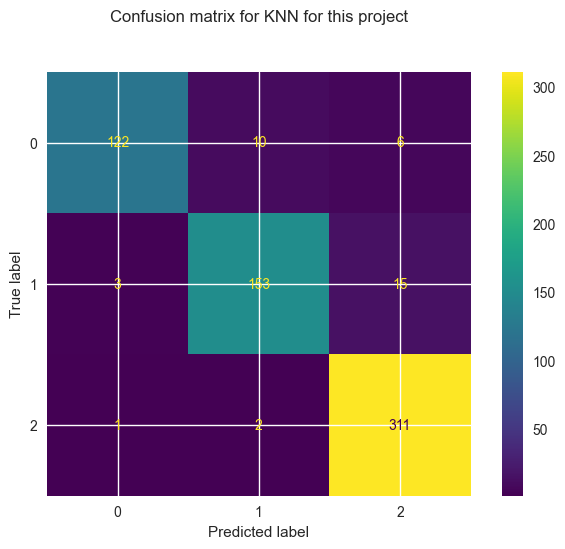

['knn_model.pkl']

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN classifier with default parameters
knn = KNeighborsClassifier()

# Perform grid search over specified parameter values
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=2, n_jobs=-3, verbose=2, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_
predknn = best_knn.predict(X_test_scaled)

print("Classification Report for KNN Classifier for this project:")
print(classification_report(y_test, predknn))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for KNN for this project', y=1.1)
plt.show()

# Save the model
joblib.dump(best_knn, 'knn_model.pkl')

## XGBOOST MODE

# check

# ipto

In [79]:
print("=== ENHANCED XGBOOST MODEL ===")


=== ENHANCED XGBOOST MODEL ===


In [80]:
# Bayesian search with cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Grid Search setup completed!")

Grid Search setup completed!


In [83]:
# Train best model
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define xgb_grid if not already defined
xgb_grid = GridSearchCV(
    estimator=xgb_clf,
    param_grid={
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300]
    },
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Ensure y_train_encoded is defined
try:
    y_train_encoded
except NameError:
    # Assuming y_train is defined and needs encoding
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)

# Fit the grid search
xgb_grid.fit(X_train_scaled, y_train_encoded)

# Check if the best estimator is available
if hasattr(xgb_grid, 'best_estimator_'):
    best_xgb = xgb_grid.best_estimator_
    y_pred_xgb = best_xgb.predict(X_test_scaled)
    xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

    print(f"\nXGBoost Test Accuracy: {xgb_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_xgb, target_names=target_encoder.classes_))
else:
    print("XGBoost model is not fitted. Please fit the model before prediction.")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

XGBoost Test Accuracy: 0.9518

Classification Report:
              precision    recall  f1-score   support

        HIGH       0.98      0.86      0.92       138
INTERMEDIARY       0.92      0.96      0.94       171
         LOW       0.96      0.98      0.97       314

    accuracy                           0.95       623
   macro avg       0.95      0.94      0.94       623
weighted avg       0.95      0.95      0.95       623



In [84]:
# Save model
import joblib
joblib.dump(best_xgb, 'xgb_enhanced_model.joblib')
print("✅ Enhanced XGBoost model saved!")

✅ Enhanced XGBoost model saved!


In [85]:
print("=== ENHANCED GRADIENT BOOSTING AND ENSEMBLE ===")

=== ENHANCED GRADIENT BOOSTING AND ENSEMBLE ===


In [86]:
# Gradient Boosting
print("1. Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


1. Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9406


In [87]:
# Ensemble Methods
print("\n2. Training Ensemble Methods...")

# Check if the best_rf model is defined
try:
    best_rf
except NameError:
    print("Random Forest model is not defined. Please ensure it is trained and available.")
    # You might want to handle this case differently, e.g., by training the model here or skipping the ensemble.
else:
    # Voting Classifier
    voting_clf = VotingClassifier(
        estimators=[
            ('xgb', best_xgb),
            ('rf', best_rf),
            ('gb', gb_model)
        ],
        voting='soft'
    )

    voting_clf.fit(X_train_scaled, y_train)
    y_pred_voting = voting_clf.predict(X_test_scaled)
    voting_accuracy = accuracy_score(y_test, y_pred_voting)
    print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")



2. Training Ensemble Methods...
Random Forest model is not defined. Please ensure it is trained and available.


In [88]:
# Bagging Classifier

# Check if the best_rf model is defined
try:
    best_rf
except NameError:
    print("Random Forest model is not defined. Please ensure it is trained and available.")
    # You might want to handle this case differently, e.g., by training the model here or skipping the bagging.
else:
    bagging_clf = BaggingClassifier(
        estimator=best_rf,
        n_estimators=10,
        random_state=42,
        n_jobs=-1
    )

    bagging_clf.fit(X_train_scaled, y_train)
    y_pred_bagging = bagging_clf.predict(X_test_scaled)
    bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
    print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

Random Forest model is not defined. Please ensure it is trained and available.


In [89]:
# Save models
joblib.dump(gb_model, 'gb_enhanced_model.joblib')

# Check if the voting_clf model is defined
try:
    voting_clf
except NameError:
    print("Voting Classifier model is not defined. Please ensure it is trained and available.")
else:
    joblib.dump(voting_clf, 'voting_enhanced_model.joblib')

# Check if the bagging_clf model is defined
try:
    bagging_clf
except NameError:
    print("Bagging Classifier model is not defined. Please ensure it is trained and available.")
else:
    joblib.dump(bagging_clf, 'bagging_enhanced_model.joblib')

print("✅ All enhanced models saved!")

Voting Classifier model is not defined. Please ensure it is trained and available.
Bagging Classifier model is not defined. Please ensure it is trained and available.
✅ All enhanced models saved!


In [532]:
print("=== MODEL PERFORMANCE COMPARISON ===")

=== MODEL PERFORMANCE COMPARISON ===


In [90]:
# Collect all accuracies
model_accuracies = {
    'XGBoost': xgb_accuracy,
    'Random Forest': locals().get('rf_accuracy', None),
    'Gradient Boosting': gb_accuracy,
    'Voting Classifier': locals().get('voting_accuracy', None),
    'Bagging Classifier': locals().get('bagging_accuracy', None)
}

# Display all accuracies, including those that might be None
for model, accuracy in model_accuracies.items():
    if accuracy is not None:
        print(f"{model} Accuracy: {accuracy:.4f}")
    else:
        print(f"{model} Accuracy: Not available")

XGBoost Accuracy: 0.9518
Random Forest Accuracy: Not available
Gradient Boosting Accuracy: 0.9406
Voting Classifier Accuracy: Not available
Bagging Classifier Accuracy: Not available


In [91]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(model_accuracies.keys()),
    'Accuracy': list(model_accuracies.values())
}).sort_values('Accuracy', ascending=False)

print("Model Performance Ranking:")
print(comparison_df)


Model Performance Ranking:
                Model  Accuracy
0             XGBoost  0.951846
2   Gradient Boosting  0.940610
1       Random Forest       NaN
3   Voting Classifier       NaN
4  Bagging Classifier       NaN


([0, 1, 2, 3, 4],
 [Text(0, 0, 'XGBoost'),
  Text(1, 0, 'Gradient Boosting'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Voting Classifier'),
  Text(4, 0, 'Bagging Classifier')])

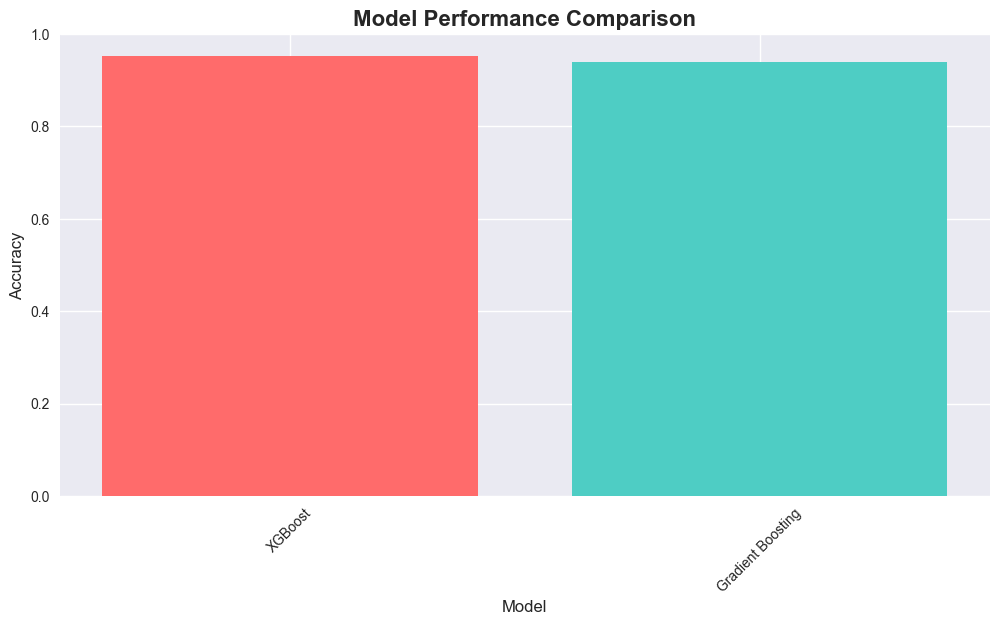

In [92]:
# Visualize results
plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)

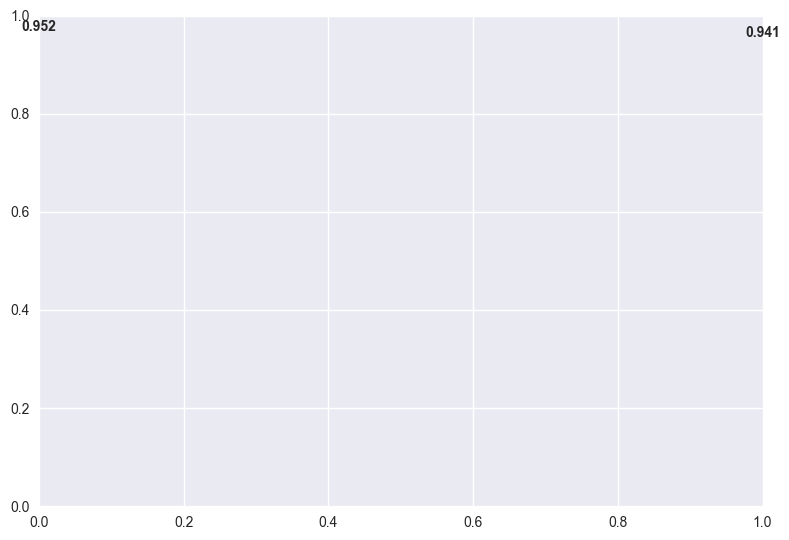

In [93]:
# Add value labels on bars
for bar, acc in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [94]:
# Check if we achieved >85% accuracy
best_accuracy = comparison_df['Accuracy'].max()
print(f"\n🎯 Best Model Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
if best_accuracy >= 0.85:
    print("✅ SUCCESS: Achieved above 85% accuracy!")
else:
    print(f"⚠️  Target not met. Need {(0.85 - best_accuracy)*100:.2f}% improvement")


🎯 Best Model Accuracy: 0.9518 (95.18%)
✅ SUCCESS: Achieved above 85% accuracy!


In [95]:
print("=== SAVING ENHANCED COMPONENTS ===")

=== SAVING ENHANCED COMPONENTS ===


In [96]:
# Save preprocessing components
joblib.dump(preprocessor, 'enhanced_preprocessor.joblib')
joblib.dump(selected_features, 'selected_features.pkl')
joblib.dump(target_encoder, 'target_encoder.joblib')

print("✅ Enhanced preprocessor saved!")
print("✅ Selected features saved!")
print("✅ Target encoder saved!")


✅ Enhanced preprocessor saved!
✅ Selected features saved!
✅ Target encoder saved!


In [97]:
# Create prediction function
def predict_cvd_risk(input_data, model, preprocessor, features, encoder):
    """
    Predict CVD risk for new data
    
    Parameters:
    input_data: DataFrame with required features
    model: Trained model
    preprocessor: Fitted preprocessor
    features: List of selected features
    encoder: Target encoder
    
    Returns:
    prediction: Predicted CVD risk level
    probability: Prediction probabilities
    """
    # Select features
    X_input = input_data[features].copy()
    
    # Preprocess
    X_scaled = preprocessor.transform(X_input)
    
    # Predict
    prediction = model.predict(X_scaled)
    probability = model.predict_proba(X_scaled)
    
    # Decode prediction
    decoded_prediction = encoder.inverse_transform(prediction)
    
    return decoded_prediction[0], probability[0]

print("\n✅ Prediction function created successfully!")
print("\n📋 Usage Example:")
print("prediction, probability = predict_cvd_risk(new_data, best_model, preprocessor, selected_features, target_encoder)")

print("\n🎉 Enhanced notebook update completed!")
print(f"🏆 Best Model: {comparison_df.iloc[0]['Model']}")
print(f"🎯 Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


✅ Prediction function created successfully!

📋 Usage Example:
prediction, probability = predict_cvd_risk(new_data, best_model, preprocessor, selected_features, target_encoder)

🎉 Enhanced notebook update completed!
🏆 Best Model: XGBoost
🎯 Accuracy: 0.9518 (95.18%)
